In [62]:
%matplotlib inline

import nltk.data;

from gensim.models import word2vec;

from sklearn.cluster import KMeans;
from sklearn.neighbors import KDTree;

import pandas as pd;
import numpy as np;

import os;
import time;
import logging;
import sys;
import multiprocessing;
import matplotlib.pyplot as plt;
from itertools import cycle;


from wordcloud import WordCloud, ImageColorGenerator

In [4]:
import pandas as pd  
import time as time

start = time.time()
data = pd.read_csv('~/Documents/CWTS_Server/citances_sample_20181223.rpt', sep = "\t")
print('Total time: ' + str((time.time() - start)) + ' secs')

Total time: 21.458638906478882 secs


First I will clean the text. Fortunately, the data here has already been subsetted into sentences, which removes one potentially difficult task. I will use the gensim utility functions to preprocess the data, remove whitespaces, remove punctuation, and remove non-alphanumeric data. 

In [5]:
# Load necessary packages
from gensim.parsing.preprocessing import preprocess_string, strip_multiple_whitespaces, strip_non_alphanum, strip_punctuation

# Define the custom filters
CUSTOM_FILTERS = [lambda x: x.lower(), strip_multiple_whitespaces, strip_punctuation, strip_non_alphanum]

start = time.time();
data_unique = data.drop_duplicates(subset = ['doi', 'sentence_seq'])
data_unique = data_unique.dropna(subset = ["text"])

features = []
for sentence in data_unique["text"]:
    clean_text = preprocess_string(sentence, CUSTOM_FILTERS)
    features.append(clean_text)

print('Total time: ' + str((time.time() - start)) + ' secs')

Total time: 367.41247510910034 secs


For the below code, I am pulling heavily from a tutorial at the following url

https://medium.com/ml2vec/using-word2vec-to-analyze-reddit-comments-28945d8cee57

I replaced some of the parameters with ones that seemed to make a little more sense given the smaller size of my data. 



In [6]:
from gensim.models import Phrases
start = time.time();

# Lets make sure that we are logging—this will take a long time and its good to get updates
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',\
    level=logging.INFO)


# Set values for various parameters
num_features = 100;    # Dimensionality of the hidden layer representation
min_word_count = 50;   # Minimum word count to keep a word in the vocabulary
num_workers = multiprocessing.cpu_count();       # Number of threads to run in parallel set to total number of cpus.
context = 5          # Context window size (on each side)                                                       
downsampling = 1e-3   # Downsample setting for frequent words

# Transforming to bigram representation
bigram_transformer = Phrases(features)

# Initialize and train the model
print("Training model...");
model = word2vec.Word2Vec(bigram_transformer[features], workers=num_workers, \
            size=num_features, min_count = min_word_count, \
            window = context, sample = downsampling);

# We don't plan on training the model any further, so calling 
# init_sims will make the model more memory efficient by normalizing the vectors in-place.
model.init_sims(replace=True);

# Save the model, just in case we can use it later
model_name = "model_citance_sample";
model.save(model_name);

print('Total time: ' + str((time.time() - start)) + ' secs')

Training model...


/Users/dakotamurray/anaconda3/lib/python3.6/site-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


Total time: 7584.249466896057 secs


In [308]:
model = Word2Vec.load("model_citance_sample")

2018-12-25 22:10:52,170 : INFO : loading Word2Vec object from model_citance_sample
2018-12-25 22:10:52,516 : INFO : loading wv recursively from model_citance_sample.wv.* with mmap=None
2018-12-25 22:10:52,518 : INFO : loading vectors from model_citance_sample.wv.vectors.npy with mmap=None
2018-12-25 22:10:52,563 : INFO : setting ignored attribute vectors_norm to None
2018-12-25 22:10:52,565 : INFO : loading vocabulary recursively from model_citance_sample.vocabulary.* with mmap=None
2018-12-25 22:10:52,568 : INFO : loading trainables recursively from model_citance_sample.trainables.* with mmap=None
2018-12-25 22:10:52,570 : INFO : loading syn1neg from model_citance_sample.trainables.syn1neg.npy with mmap=None
2018-12-25 22:10:52,615 : INFO : setting ignored attribute cum_table to None
2018-12-25 22:10:52,617 : INFO : loaded model_citance_sample


In [7]:
model.wv.most_similar("regression")

/Users/dakotamurray/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('linear_regression', 0.8364286422729492),
 ('regression_analysis', 0.8084414005279541),
 ('logistic_regression', 0.7844284176826477),
 ('univariate', 0.7810285687446594),
 ('nonparametric', 0.7450448274612427),
 ('kriging', 0.716891884803772),
 ('logit', 0.7137719392776489),
 ('variable_selection', 0.7109898328781128),
 ('moving_average', 0.7108420729637146),
 ('multivariate', 0.7101548910140991)]

In [8]:
model.wv.most_similar("controversial")

/Users/dakotamurray/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('debatable', 0.805150032043457),
 ('highly_controversial', 0.8046971559524536),
 ('equivocal', 0.7985600829124451),
 ('still_controversial', 0.7937566041946411),
 ('inconclusive', 0.7920565605163574),
 ('unclear', 0.7854132652282715),
 ('somewhat_controversial', 0.7759248614311218),
 ('contradictory', 0.7567384243011475),
 ('questionable', 0.7429936528205872),
 ('still_debated', 0.7305647730827332)]

In [9]:
model.wv.most_similar('discovered')

/Users/dakotamurray/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('noticed', 0.7874438762664795),
 ('identified', 0.7866150140762329),
 ('documented', 0.7635195255279541),
 ('postulated', 0.7634725570678711),
 ('noted', 0.7579987645149231),
 ('found', 0.7508113384246826),
 ('suggested', 0.7456482648849487),
 ('claimed', 0.7398945689201355),
 ('demonstrated', 0.7388673424720764),
 ('reported', 0.7384119033813477)]

In [10]:
model.wv.most_similar('uncertain')

/Users/dakotamurray/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('ambiguous', 0.735744297504425),
 ('imprecise', 0.7326213121414185),
 ('unknown', 0.7228853106498718),
 ('unpredictable', 0.676755428314209),
 ('unreliable', 0.6517151594161987),
 ('time_varying', 0.649237871170044),
 ('infeasible', 0.636352002620697),
 ('incomplete_information', 0.63588547706604),
 ('unrealistic', 0.6344642043113708),
 ('inaccurate', 0.6273403763771057)]

For the following code, I take almost directly form the following blog, which I have relied upon or most of this experimnet,

https://medium.com/ml2vec/using-word2vec-to-analyze-reddit-comments-28945d8cee57

This code will cluster together all words from the word2vec model, display and save a series of wordcloud figures.  

In [323]:
def clustering_on_wordvecs(word_vectors, num_clusters):
    # Initalize a k-means object and use it to extract centroids
    kmeans_clustering = KMeans(n_clusters = num_clusters, init='k-means++');
    idx = kmeans_clustering.fit_predict(word_vectors);
    
    return kmeans_clustering.cluster_centers_, idx;

Z = model.wv.vectors
centers, clusters = clustering_on_wordvecs(Z, 16);
centroid_map = dict(zip(model.wv.index2word, clusters));

In [316]:
def get_top_words(index2word, k, centers, wordvecs):
    tree = KDTree(wordvecs);

    #Closest points for each Cluster center is used to query the closest 20 points to it.
    closest_points = [tree.query(np.reshape(x, (1, -1)), k=k) for x in centers];
    closest_words_idxs = [x[1] for x in closest_points];

    #Word Index is queried for each position in the above array, and added to a Dictionary.
    closest_words = {};
    for i in range(0, len(closest_words_idxs)):
        closest_words['Cluster #' + str(i + 1).zfill(2)] = ["" + index2word[j] for j in closest_words_idxs[i][0]]

    #A DataFrame is generated from the dictionary.
    df = pd.DataFrame(closest_words);
    df.index = df.index+1

    return df;

top_words = get_top_words(model.wv.index2word, 1000, centers, Z);

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


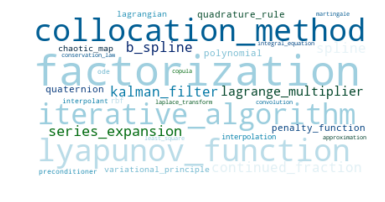

In [311]:
def display_cloud(cluster_num, cmap):
    wc = WordCloud(background_color="white", max_words=30, max_font_size=80, colormap=cmap, relative_scaling = 0, prefer_horizontal = 0.98);
    wordcloud = wc.generate(' '.join([word for word in top_words['Cluster #' + str(cluster_num).zfill(2)]]))

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.savefig('cluster_' + str(cluster_num), bbox_inches='tight')
    
cmaps = cycle([
        'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
        'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg', 'hsv',
        'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar'])

for i in range(20):
    print(i)
    col = next(cmaps);
    display_cloud(i+1, "ocean")

In [325]:
top_words

,Cluster #01,Cluster #02,Cluster #03,Cluster #04,Cluster #05,Cluster #06,Cluster #07,Cluster #08,Cluster #09,Cluster #10,Cluster #11,Cluster #12,Cluster #13,Cluster #14,Cluster #15,Cluster #16
1,self_presentation,astrocytic,regularized,pokorny,corticosteroid_therapy,923,dimethylamine,financial_services,cowpea,piston,kamchatka,1exp,matlab_software,erbb4,titanium_oxide,tied
2,morality,vsmc,hermite,witkowski,intracranial_hemorrhage,875,benzoic_acid,public_funding,shrimps,cylinder,coastal_plain,2s2,imagej,hnf4a,copper_oxide,overwhelmed
3,compassion,podocytes,factorization,de_boeck,cholelithiasis,661,resorcinol,federal_government,acacia,roller,tethys,cosf,computer_software,caveolin_1,vanadium_oxide,cognizant
4,gratitude,smooth_muscles,chebyshev,zobel,renal_insufficiency,954,benzoate,private_companies,actinomycetes,wall,karoo,02p,software_program,fgfr,znfe2o4,attuned
5,deception,schwann_cells,newton_method,beckerman,gerd,605,thiourea,usaid,grapevines,rotating,patagonia,2ln,bruker,mek1,silicon_oxide,reminded
6,sympathy,enteric_neurons,lanczos,werth,adhf,915,ethanolamine,overseas,crab,blade,lacustrine_deposits,nµ,software_imagej,isg15,molybdenum_oxide,undermined
7,entitlement,microglia_activation,polynomial_approximation,meurer,neutropenia,872,maleic_acid,catering,senecio,conical,altiplano,eµ,bruker_axs,nod1,composite_electrodes,confronted_with
8,intentionality,carotid_body,recursive,fuerst,hyperbilirubinemia,845,p_cresol,dubai,mulberry,vibrating,upper_cretaceous,arctan,imagej_software,cox2,si3n4,put
9,impression_management,peripheral_nerves,galerkin,pardini,pancreatitis,790,hydroquinone,public_housing,asparagus,cylindrical,playa,cosa,afni,pkd1,nano_powders,communicated
10,prosocial_behavior,pituitary,variational,filion,amenorrhea,910,oleate,railways,faba_bean,inner_cylinder,wadi,0r,hamburg_germany,histone_methyltransferase,tio2_sio2,remembered


Now we will repeat the above process, except now we will be working with the abstracts of these texts, rather than the citances. 

Lets also save the words, so that we might try to use them inside ggplot for another visualizaiton

In [322]:
top_words.to_csv("top_words_citance.csv", sep = "\t")

In [217]:
start = time.time()
pubs = pd.read_csv('~/Documents/CWTS_Server/abstracts_sample_20181225.rpt', sep = "\t")
print('Total time: ' + str((time.time() - start)) + ' secs')

Total time: 3.236905813217163 secs


In [218]:
import re
start = time.time();


abstract_features = []
pubs_no_na = pubs.dropna(subset = ["abstract"])
for text in pubs_no_na["abstract"]:
        
    sentences = tokenizer.tokenize(text);
    sentences = [re.sub("[\.]", "", sentence) for sentence in sentences];
    for sentence in sentences:
        clean_text = preprocess_string(sentence, CUSTOM_FILTERS)
        abstract_features.append(clean_text)
        
print('Total time: ' + str((time.time() - start)) + ' secs')

Total time: 234.03969812393188 secs


In [219]:
start = time.time();

# Lets make sure that we are logging—this will take a long time and its good to get updates
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',\
    level=logging.INFO)


# Set values for various parameters
num_features = 100;    # Dimensionality of the hidden layer representation
min_word_count = 50;   # Minimum word count to keep a word in the vocabulary
num_workers = multiprocessing.cpu_count();       # Number of threads to run in parallel set to total number of cpus.
context = 5          # Context window size (on each side)                                                       
downsampling = 1e-3   # Downsample setting for frequent words

# Transforming to bigram representation
bigram_transformer = Phrases(abstract_features)

# Initialize and train the model
print("Training model...");
model = word2vec.Word2Vec(bigram_transformer[abstract_features], workers=num_workers, \
            size=num_features, min_count = min_word_count, \
            window = context, sample = downsampling);

# We don't plan on training the model any further, so calling 
# init_sims will make the model more memory efficient by normalizing the vectors in-place.
model.init_sims(replace=True);

# Save the model, just in case we can use it later
model_name = "model_abstract_sample";
model.save(model_name);

print('Total time: ' + str((time.time() - start)) + ' secs')

2018-12-25 14:45:27,436 : INFO : collecting all words and their counts
2018-12-25 14:45:27,444 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2018-12-25 14:45:27,964 : INFO : PROGRESS: at sentence #10000, processed 221662 words and 138903 word types
2018-12-25 14:45:28,340 : INFO : PROGRESS: at sentence #20000, processed 444972 words and 243764 word types
2018-12-25 14:45:28,709 : INFO : PROGRESS: at sentence #30000, processed 668273 words and 337608 word types
2018-12-25 14:45:29,105 : INFO : PROGRESS: at sentence #40000, processed 892824 words and 424902 word types
2018-12-25 14:45:29,477 : INFO : PROGRESS: at sentence #50000, processed 1121574 words and 506392 word types
2018-12-25 14:45:29,849 : INFO : PROGRESS: at sentence #60000, processed 1345872 words and 583533 word types
2018-12-25 14:45:30,233 : INFO : PROGRESS: at sentence #70000, processed 1570463 words and 657948 word types
2018-12-25 14:45:30,676 : INFO : PROGRESS: at sentence #80000, processed 179

2018-12-25 14:45:55,805 : INFO : PROGRESS: at sentence #740000, processed 16579531 words and 3878113 word types
2018-12-25 14:45:56,190 : INFO : PROGRESS: at sentence #750000, processed 16805282 words and 3916562 word types
2018-12-25 14:45:56,574 : INFO : PROGRESS: at sentence #760000, processed 17030395 words and 3954878 word types
2018-12-25 14:45:56,956 : INFO : PROGRESS: at sentence #770000, processed 17254983 words and 3993048 word types
2018-12-25 14:45:57,334 : INFO : PROGRESS: at sentence #780000, processed 17477558 words and 4030836 word types
2018-12-25 14:45:57,714 : INFO : PROGRESS: at sentence #790000, processed 17702654 words and 4068146 word types
2018-12-25 14:45:58,098 : INFO : PROGRESS: at sentence #800000, processed 17927219 words and 4106284 word types
2018-12-25 14:45:58,478 : INFO : PROGRESS: at sentence #810000, processed 18151397 words and 4143171 word types
2018-12-25 14:45:58,857 : INFO : PROGRESS: at sentence #820000, processed 18374967 words and 4180136 wor

2018-12-25 14:46:23,987 : INFO : PROGRESS: at sentence #1470000, processed 32920982 words and 6359448 word types
2018-12-25 14:46:24,355 : INFO : PROGRESS: at sentence #1480000, processed 33148040 words and 6390306 word types
2018-12-25 14:46:24,718 : INFO : PROGRESS: at sentence #1490000, processed 33370680 words and 6420728 word types
2018-12-25 14:46:25,092 : INFO : PROGRESS: at sentence #1500000, processed 33594190 words and 6451113 word types
2018-12-25 14:46:25,460 : INFO : PROGRESS: at sentence #1510000, processed 33820764 words and 6481939 word types
2018-12-25 14:46:25,829 : INFO : PROGRESS: at sentence #1520000, processed 34047834 words and 6512895 word types
2018-12-25 14:46:26,198 : INFO : PROGRESS: at sentence #1530000, processed 34274897 words and 6543894 word types
2018-12-25 14:46:26,563 : INFO : PROGRESS: at sentence #1540000, processed 34499223 words and 6575258 word types
2018-12-25 14:46:26,926 : INFO : PROGRESS: at sentence #1550000, processed 34722096 words and 66

Training model...


2018-12-25 14:46:36,426 : INFO : PROGRESS: at sentence #10000, processed 198308 words, keeping 27546 word types
2018-12-25 14:46:37,276 : INFO : PROGRESS: at sentence #20000, processed 398186 words, keeping 43578 word types
2018-12-25 14:46:38,130 : INFO : PROGRESS: at sentence #30000, processed 598035 words, keeping 56511 word types
2018-12-25 14:46:38,993 : INFO : PROGRESS: at sentence #40000, processed 799143 words, keeping 67683 word types
2018-12-25 14:46:39,857 : INFO : PROGRESS: at sentence #50000, processed 1003841 words, keeping 77295 word types
2018-12-25 14:46:40,720 : INFO : PROGRESS: at sentence #60000, processed 1204357 words, keeping 86140 word types
2018-12-25 14:46:41,587 : INFO : PROGRESS: at sentence #70000, processed 1405434 words, keeping 94080 word types
2018-12-25 14:46:42,465 : INFO : PROGRESS: at sentence #80000, processed 1607576 words, keeping 101521 word types
2018-12-25 14:46:43,333 : INFO : PROGRESS: at sentence #90000, processed 1807680 words, keeping 108

2018-12-25 14:47:40,103 : INFO : PROGRESS: at sentence #730000, processed 14641348 words, keeping 313032 word types
2018-12-25 14:47:40,982 : INFO : PROGRESS: at sentence #740000, processed 14839268 words, keeping 315073 word types
2018-12-25 14:47:41,885 : INFO : PROGRESS: at sentence #750000, processed 15041924 words, keeping 317043 word types
2018-12-25 14:47:42,782 : INFO : PROGRESS: at sentence #760000, processed 15243468 words, keeping 319032 word types
2018-12-25 14:47:43,664 : INFO : PROGRESS: at sentence #770000, processed 15444646 words, keeping 320943 word types
2018-12-25 14:47:44,550 : INFO : PROGRESS: at sentence #780000, processed 15643700 words, keeping 322823 word types
2018-12-25 14:47:45,459 : INFO : PROGRESS: at sentence #790000, processed 15845310 words, keeping 324630 word types
2018-12-25 14:47:46,356 : INFO : PROGRESS: at sentence #800000, processed 16046735 words, keeping 326561 word types
2018-12-25 14:47:47,249 : INFO : PROGRESS: at sentence #810000, processe

2018-12-25 14:48:43,432 : INFO : PROGRESS: at sentence #1440000, processed 28865248 words, keeping 429643 word types
2018-12-25 14:48:44,293 : INFO : PROGRESS: at sentence #1450000, processed 29063946 words, keeping 431153 word types
2018-12-25 14:48:45,158 : INFO : PROGRESS: at sentence #1460000, processed 29264301 words, keeping 432523 word types
2018-12-25 14:48:46,037 : INFO : PROGRESS: at sentence #1470000, processed 29469026 words, keeping 433883 word types
2018-12-25 14:48:46,931 : INFO : PROGRESS: at sentence #1480000, processed 29672284 words, keeping 435271 word types
2018-12-25 14:48:47,836 : INFO : PROGRESS: at sentence #1490000, processed 29872050 words, keeping 436666 word types
2018-12-25 14:48:48,719 : INFO : PROGRESS: at sentence #1500000, processed 30071699 words, keeping 438178 word types
2018-12-25 14:48:49,601 : INFO : PROGRESS: at sentence #1510000, processed 30274677 words, keeping 439642 word types
2018-12-25 14:48:50,515 : INFO : PROGRESS: at sentence #1520000,

2018-12-25 14:49:44,953 : INFO : EPOCH 1 - PROGRESS: at 17.86% examples, 151191 words/s, in_qsize 0, out_qsize 0
2018-12-25 14:49:45,976 : INFO : EPOCH 1 - PROGRESS: at 18.48% examples, 151201 words/s, in_qsize 0, out_qsize 0
2018-12-25 14:49:47,008 : INFO : EPOCH 1 - PROGRESS: at 19.11% examples, 151172 words/s, in_qsize 0, out_qsize 0
2018-12-25 14:49:48,030 : INFO : EPOCH 1 - PROGRESS: at 19.72% examples, 151171 words/s, in_qsize 0, out_qsize 0
2018-12-25 14:49:49,056 : INFO : EPOCH 1 - PROGRESS: at 20.34% examples, 151165 words/s, in_qsize 0, out_qsize 0
2018-12-25 14:49:50,093 : INFO : EPOCH 1 - PROGRESS: at 20.95% examples, 151093 words/s, in_qsize 0, out_qsize 0
2018-12-25 14:49:51,094 : INFO : EPOCH 1 - PROGRESS: at 21.53% examples, 150988 words/s, in_qsize 0, out_qsize 0
2018-12-25 14:49:52,114 : INFO : EPOCH 1 - PROGRESS: at 22.15% examples, 150997 words/s, in_qsize 0, out_qsize 0
2018-12-25 14:49:53,143 : INFO : EPOCH 1 - PROGRESS: at 22.76% examples, 150978 words/s, in_qsiz

2018-12-25 14:50:59,996 : INFO : EPOCH 1 - PROGRESS: at 62.49% examples, 150016 words/s, in_qsize 0, out_qsize 0
2018-12-25 14:51:01,019 : INFO : EPOCH 1 - PROGRESS: at 63.11% examples, 150027 words/s, in_qsize 0, out_qsize 0
2018-12-25 14:51:02,037 : INFO : EPOCH 1 - PROGRESS: at 63.73% examples, 150043 words/s, in_qsize 0, out_qsize 0
2018-12-25 14:51:03,073 : INFO : EPOCH 1 - PROGRESS: at 64.35% examples, 150033 words/s, in_qsize 0, out_qsize 0
2018-12-25 14:51:04,109 : INFO : EPOCH 1 - PROGRESS: at 64.96% examples, 150026 words/s, in_qsize 0, out_qsize 0
2018-12-25 14:51:05,152 : INFO : EPOCH 1 - PROGRESS: at 65.59% examples, 150008 words/s, in_qsize 0, out_qsize 0
2018-12-25 14:51:06,185 : INFO : EPOCH 1 - PROGRESS: at 66.21% examples, 150010 words/s, in_qsize 0, out_qsize 0
2018-12-25 14:51:07,197 : INFO : EPOCH 1 - PROGRESS: at 66.82% examples, 150032 words/s, in_qsize 0, out_qsize 0
2018-12-25 14:51:08,220 : INFO : EPOCH 1 - PROGRESS: at 67.43% examples, 150036 words/s, in_qsiz

2018-12-25 14:52:07,476 : INFO : EPOCH 2 - PROGRESS: at 2.54% examples, 154539 words/s, in_qsize 0, out_qsize 0
2018-12-25 14:52:08,513 : INFO : EPOCH 2 - PROGRESS: at 3.18% examples, 154743 words/s, in_qsize 0, out_qsize 0
2018-12-25 14:52:09,554 : INFO : EPOCH 2 - PROGRESS: at 3.82% examples, 154824 words/s, in_qsize 0, out_qsize 0
2018-12-25 14:52:10,559 : INFO : EPOCH 2 - PROGRESS: at 4.43% examples, 154696 words/s, in_qsize 0, out_qsize 0
2018-12-25 14:52:11,565 : INFO : EPOCH 2 - PROGRESS: at 5.04% examples, 154564 words/s, in_qsize 0, out_qsize 0
2018-12-25 14:52:12,601 : INFO : EPOCH 2 - PROGRESS: at 5.68% examples, 154713 words/s, in_qsize 0, out_qsize 0
2018-12-25 14:52:13,637 : INFO : EPOCH 2 - PROGRESS: at 6.32% examples, 154834 words/s, in_qsize 0, out_qsize 0
2018-12-25 14:52:14,675 : INFO : EPOCH 2 - PROGRESS: at 6.96% examples, 154946 words/s, in_qsize 0, out_qsize 0
2018-12-25 14:52:15,717 : INFO : EPOCH 2 - PROGRESS: at 7.61% examples, 154981 words/s, in_qsize 0, out_

2018-12-25 14:53:22,449 : INFO : EPOCH 2 - PROGRESS: at 47.55% examples, 151212 words/s, in_qsize 0, out_qsize 0
2018-12-25 14:53:23,477 : INFO : EPOCH 2 - PROGRESS: at 48.17% examples, 151199 words/s, in_qsize 0, out_qsize 0
2018-12-25 14:53:24,512 : INFO : EPOCH 2 - PROGRESS: at 48.78% examples, 151176 words/s, in_qsize 0, out_qsize 0
2018-12-25 14:53:25,557 : INFO : EPOCH 2 - PROGRESS: at 49.41% examples, 151128 words/s, in_qsize 0, out_qsize 0
2018-12-25 14:53:26,584 : INFO : EPOCH 2 - PROGRESS: at 50.02% examples, 151115 words/s, in_qsize 0, out_qsize 0
2018-12-25 14:53:27,633 : INFO : EPOCH 2 - PROGRESS: at 50.63% examples, 151063 words/s, in_qsize 0, out_qsize 0
2018-12-25 14:53:28,650 : INFO : EPOCH 2 - PROGRESS: at 51.26% examples, 151068 words/s, in_qsize 0, out_qsize 0
2018-12-25 14:53:29,690 : INFO : EPOCH 2 - PROGRESS: at 51.87% examples, 151045 words/s, in_qsize 0, out_qsize 0
2018-12-25 14:53:30,748 : INFO : EPOCH 2 - PROGRESS: at 52.48% examples, 150990 words/s, in_qsiz

2018-12-25 14:54:37,649 : INFO : EPOCH 2 - PROGRESS: at 92.15% examples, 150178 words/s, in_qsize 0, out_qsize 0
2018-12-25 14:54:38,713 : INFO : EPOCH 2 - PROGRESS: at 92.76% examples, 150142 words/s, in_qsize 0, out_qsize 0
2018-12-25 14:54:39,733 : INFO : EPOCH 2 - PROGRESS: at 93.38% examples, 150145 words/s, in_qsize 0, out_qsize 0
2018-12-25 14:54:40,774 : INFO : EPOCH 2 - PROGRESS: at 93.99% examples, 150130 words/s, in_qsize 0, out_qsize 0
2018-12-25 14:54:41,806 : INFO : EPOCH 2 - PROGRESS: at 94.60% examples, 150127 words/s, in_qsize 0, out_qsize 0
2018-12-25 14:54:42,851 : INFO : EPOCH 2 - PROGRESS: at 95.21% examples, 150112 words/s, in_qsize 0, out_qsize 0
2018-12-25 14:54:43,886 : INFO : EPOCH 2 - PROGRESS: at 95.82% examples, 150106 words/s, in_qsize 0, out_qsize 0
2018-12-25 14:54:44,897 : INFO : EPOCH 2 - PROGRESS: at 96.41% examples, 150079 words/s, in_qsize 0, out_qsize 0
2018-12-25 14:54:45,918 : INFO : EPOCH 2 - PROGRESS: at 97.03% examples, 150084 words/s, in_qsiz

2018-12-25 14:55:45,142 : INFO : EPOCH 3 - PROGRESS: at 32.76% examples, 151978 words/s, in_qsize 0, out_qsize 0
2018-12-25 14:55:46,164 : INFO : EPOCH 3 - PROGRESS: at 33.36% examples, 151966 words/s, in_qsize 0, out_qsize 0
2018-12-25 14:55:47,206 : INFO : EPOCH 3 - PROGRESS: at 34.01% examples, 152029 words/s, in_qsize 0, out_qsize 0
2018-12-25 14:55:48,214 : INFO : EPOCH 3 - PROGRESS: at 34.62% examples, 152045 words/s, in_qsize 0, out_qsize 0
2018-12-25 14:55:49,221 : INFO : EPOCH 3 - PROGRESS: at 35.24% examples, 152066 words/s, in_qsize 0, out_qsize 0
2018-12-25 14:55:50,238 : INFO : EPOCH 3 - PROGRESS: at 35.85% examples, 152068 words/s, in_qsize 0, out_qsize 0
2018-12-25 14:55:51,280 : INFO : EPOCH 3 - PROGRESS: at 36.48% examples, 152115 words/s, in_qsize 0, out_qsize 0
2018-12-25 14:55:52,288 : INFO : EPOCH 3 - PROGRESS: at 37.10% examples, 152138 words/s, in_qsize 0, out_qsize 0
2018-12-25 14:55:53,296 : INFO : EPOCH 3 - PROGRESS: at 37.72% examples, 152155 words/s, in_qsiz

2018-12-25 14:57:00,227 : INFO : EPOCH 3 - PROGRESS: at 77.65% examples, 150969 words/s, in_qsize 0, out_qsize 0
2018-12-25 14:57:01,270 : INFO : EPOCH 3 - PROGRESS: at 78.25% examples, 150948 words/s, in_qsize 0, out_qsize 0
2018-12-25 14:57:02,274 : INFO : EPOCH 3 - PROGRESS: at 78.84% examples, 150916 words/s, in_qsize 0, out_qsize 0
2018-12-25 14:57:03,310 : INFO : EPOCH 3 - PROGRESS: at 79.46% examples, 150903 words/s, in_qsize 0, out_qsize 0
2018-12-25 14:57:04,346 : INFO : EPOCH 3 - PROGRESS: at 80.07% examples, 150889 words/s, in_qsize 0, out_qsize 0
2018-12-25 14:57:05,380 : INFO : EPOCH 3 - PROGRESS: at 80.68% examples, 150878 words/s, in_qsize 0, out_qsize 0
2018-12-25 14:57:06,426 : INFO : EPOCH 3 - PROGRESS: at 81.30% examples, 150851 words/s, in_qsize 0, out_qsize 0
2018-12-25 14:57:07,464 : INFO : EPOCH 3 - PROGRESS: at 81.91% examples, 150835 words/s, in_qsize 0, out_qsize 0
2018-12-25 14:57:08,504 : INFO : EPOCH 3 - PROGRESS: at 82.51% examples, 150815 words/s, in_qsiz

2018-12-25 14:58:06,904 : INFO : EPOCH 4 - PROGRESS: at 17.24% examples, 152396 words/s, in_qsize 0, out_qsize 0
2018-12-25 14:58:07,930 : INFO : EPOCH 4 - PROGRESS: at 17.86% examples, 152335 words/s, in_qsize 0, out_qsize 0
2018-12-25 14:58:08,957 : INFO : EPOCH 4 - PROGRESS: at 18.48% examples, 152283 words/s, in_qsize 0, out_qsize 0
2018-12-25 14:58:09,987 : INFO : EPOCH 4 - PROGRESS: at 19.11% examples, 152221 words/s, in_qsize 0, out_qsize 0
2018-12-25 14:58:11,023 : INFO : EPOCH 4 - PROGRESS: at 19.72% examples, 152117 words/s, in_qsize 0, out_qsize 0
2018-12-25 14:58:12,029 : INFO : EPOCH 4 - PROGRESS: at 20.34% examples, 152179 words/s, in_qsize 0, out_qsize 0
2018-12-25 14:58:13,054 : INFO : EPOCH 4 - PROGRESS: at 20.95% examples, 152127 words/s, in_qsize 0, out_qsize 0
2018-12-25 14:58:14,073 : INFO : EPOCH 4 - PROGRESS: at 21.56% examples, 152109 words/s, in_qsize 0, out_qsize 0
2018-12-25 14:58:15,098 : INFO : EPOCH 4 - PROGRESS: at 22.18% examples, 152060 words/s, in_qsiz

2018-12-25 14:59:21,855 : INFO : EPOCH 4 - PROGRESS: at 61.91% examples, 150524 words/s, in_qsize 0, out_qsize 0
2018-12-25 14:59:22,880 : INFO : EPOCH 4 - PROGRESS: at 62.52% examples, 150528 words/s, in_qsize 0, out_qsize 0
2018-12-25 14:59:23,918 : INFO : EPOCH 4 - PROGRESS: at 63.14% examples, 150511 words/s, in_qsize 0, out_qsize 0
2018-12-25 14:59:24,932 : INFO : EPOCH 4 - PROGRESS: at 63.75% examples, 150528 words/s, in_qsize 0, out_qsize 0
2018-12-25 14:59:25,978 : INFO : EPOCH 4 - PROGRESS: at 64.41% examples, 150564 words/s, in_qsize 0, out_qsize 0
2018-12-25 14:59:26,997 : INFO : EPOCH 4 - PROGRESS: at 65.02% examples, 150576 words/s, in_qsize 0, out_qsize 0
2018-12-25 14:59:28,054 : INFO : EPOCH 4 - PROGRESS: at 65.65% examples, 150533 words/s, in_qsize 0, out_qsize 0
2018-12-25 14:59:29,068 : INFO : EPOCH 4 - PROGRESS: at 66.27% examples, 150556 words/s, in_qsize 0, out_qsize 0
2018-12-25 14:59:30,102 : INFO : EPOCH 4 - PROGRESS: at 66.88% examples, 150543 words/s, in_qsiz

2018-12-25 15:00:28,856 : INFO : EPOCH 5 - PROGRESS: at 1.88% examples, 153602 words/s, in_qsize 0, out_qsize 0
2018-12-25 15:00:29,860 : INFO : EPOCH 5 - PROGRESS: at 2.49% examples, 153679 words/s, in_qsize 0, out_qsize 0
2018-12-25 15:00:30,864 : INFO : EPOCH 5 - PROGRESS: at 3.09% examples, 153691 words/s, in_qsize 0, out_qsize 0
2018-12-25 15:00:31,892 : INFO : EPOCH 5 - PROGRESS: at 3.71% examples, 153173 words/s, in_qsize 0, out_qsize 0
2018-12-25 15:00:32,895 : INFO : EPOCH 5 - PROGRESS: at 4.32% examples, 153312 words/s, in_qsize 0, out_qsize 0
2018-12-25 15:00:33,911 : INFO : EPOCH 5 - PROGRESS: at 4.93% examples, 153216 words/s, in_qsize 0, out_qsize 0
2018-12-25 15:00:34,927 : INFO : EPOCH 5 - PROGRESS: at 5.54% examples, 153071 words/s, in_qsize 0, out_qsize 0
2018-12-25 15:00:35,943 : INFO : EPOCH 5 - PROGRESS: at 6.15% examples, 152968 words/s, in_qsize 0, out_qsize 0
2018-12-25 15:00:36,961 : INFO : EPOCH 5 - PROGRESS: at 6.77% examples, 152873 words/s, in_qsize 0, out_

2018-12-25 15:01:43,397 : INFO : EPOCH 5 - PROGRESS: at 46.67% examples, 151261 words/s, in_qsize 0, out_qsize 0
2018-12-25 15:01:44,423 : INFO : EPOCH 5 - PROGRESS: at 47.27% examples, 151247 words/s, in_qsize 0, out_qsize 0
2018-12-25 15:01:45,424 : INFO : EPOCH 5 - PROGRESS: at 47.86% examples, 151197 words/s, in_qsize 0, out_qsize 0
2018-12-25 15:01:46,443 : INFO : EPOCH 5 - PROGRESS: at 48.48% examples, 151202 words/s, in_qsize 0, out_qsize 0
2018-12-25 15:01:47,481 : INFO : EPOCH 5 - PROGRESS: at 49.10% examples, 151169 words/s, in_qsize 0, out_qsize 0
2018-12-25 15:01:48,534 : INFO : EPOCH 5 - PROGRESS: at 49.72% examples, 151106 words/s, in_qsize 0, out_qsize 0
2018-12-25 15:01:49,550 : INFO : EPOCH 5 - PROGRESS: at 50.33% examples, 151113 words/s, in_qsize 0, out_qsize 0
2018-12-25 15:01:50,582 : INFO : EPOCH 5 - PROGRESS: at 50.95% examples, 151089 words/s, in_qsize 0, out_qsize 0
2018-12-25 15:01:51,626 : INFO : EPOCH 5 - PROGRESS: at 51.56% examples, 151049 words/s, in_qsiz

2018-12-25 15:02:58,588 : INFO : EPOCH 5 - PROGRESS: at 91.23% examples, 150144 words/s, in_qsize 0, out_qsize 0
2018-12-25 15:02:59,614 : INFO : EPOCH 5 - PROGRESS: at 91.84% examples, 150146 words/s, in_qsize 0, out_qsize 0
2018-12-25 15:03:00,657 : INFO : EPOCH 5 - PROGRESS: at 92.46% examples, 150134 words/s, in_qsize 0, out_qsize 0
2018-12-25 15:03:01,692 : INFO : EPOCH 5 - PROGRESS: at 93.07% examples, 150122 words/s, in_qsize 0, out_qsize 0
2018-12-25 15:03:02,758 : INFO : EPOCH 5 - PROGRESS: at 93.66% examples, 150039 words/s, in_qsize 0, out_qsize 0
2018-12-25 15:03:03,784 : INFO : EPOCH 5 - PROGRESS: at 94.24% examples, 149999 words/s, in_qsize 0, out_qsize 0
2018-12-25 15:03:04,798 : INFO : EPOCH 5 - PROGRESS: at 94.85% examples, 150011 words/s, in_qsize 0, out_qsize 0
2018-12-25 15:03:05,830 : INFO : EPOCH 5 - PROGRESS: at 95.46% examples, 150012 words/s, in_qsize 0, out_qsize 0
2018-12-25 15:03:06,833 : INFO : EPOCH 5 - PROGRESS: at 96.04% examples, 149989 words/s, in_qsiz

Total time: 1066.7920899391174 secs


In [221]:
model.wv.most_similar("regression")

/Users/dakotamurray/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('linear_regression', 0.8287765979766846),
 ('logistic_regression', 0.7831673622131348),
 ('regression_analysis', 0.782815158367157),
 ('regressions', 0.7708209753036499),
 ('univariate', 0.7562885284423828),
 ('multivariate', 0.755821168422699),
 ('regression_models', 0.7336349487304688),
 ('logistic', 0.7209181785583496),
 ('negative_binomial', 0.7204647064208984),
 ('multiple_linear', 0.7199587225914001)]

In [222]:
model.wv.most_similar('uncertain')

/Users/dakotamurray/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('unknown', 0.7797398567199707),
 ('imprecise', 0.6902613043785095),
 ('time_varying', 0.679482102394104),
 ('restrictive', 0.6593235731124878),
 ('ambiguous', 0.6523334383964539),
 ('stochastic', 0.6325812935829163),
 ('incorrect', 0.6234470009803772),
 ('imperfect', 0.6185747981071472),
 ('deterministic', 0.617194414138794),
 ('unconstrained', 0.6148145794868469)]

In [223]:
model.wv.most_similar('discovered')

/Users/dakotamurray/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('postulated', 0.7922104597091675),
 ('noticed', 0.7730064392089844),
 ('recently_reported', 0.7620360851287842),
 ('identified', 0.7517187595367432),
 ('uncovered', 0.7170093059539795),
 ('clarified', 0.7133961915969849),
 ('previously_demonstrated', 0.7119249105453491),
 ('recognized', 0.6969555616378784),
 ('found', 0.6956900954246521),
 ('noted', 0.682866096496582)]

In [224]:
model.wv.most_similar("controversial")

/Users/dakotamurray/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('still_limited', 0.8115819692611694),
 ('well_documented', 0.8044136762619019),
 ('still_controversial', 0.7957706451416016),
 ('less_clear', 0.7908711433410645),
 ('unclear', 0.7849380970001221),
 ('debated', 0.751497209072113),
 ('questionable', 0.7450261116027832),
 ('scarce', 0.7387233972549438),
 ('incompletely_understood', 0.7355901002883911),
 ('inconclusive', 0.7285963892936707)]

maybe an x & y plot, showing the similarity between a word, say "uncertain", and 1000 or so randomly sampled other words (or the next 1000 most similar). If the meaning is similar, then the similarity (sim for model 1 on the x-acis, sim for model 2 on the y) should be a diagonal line. 

In [225]:
from gensim.models import Word2Vec
abs_model = Word2Vec.load("model_abstract_sample")
citance_model = Word2Vec.load("model_citance_sample")

2018-12-25 16:43:21,119 : INFO : loading Word2Vec object from model_abstract_sample
2018-12-25 16:43:21,443 : INFO : loading wv recursively from model_abstract_sample.wv.* with mmap=None
2018-12-25 16:43:21,445 : INFO : setting ignored attribute vectors_norm to None
2018-12-25 16:43:21,447 : INFO : loading vocabulary recursively from model_abstract_sample.vocabulary.* with mmap=None
2018-12-25 16:43:21,448 : INFO : loading trainables recursively from model_abstract_sample.trainables.* with mmap=None
2018-12-25 16:43:21,450 : INFO : setting ignored attribute cum_table to None
2018-12-25 16:43:21,452 : INFO : loaded model_abstract_sample
2018-12-25 16:43:21,572 : INFO : loading Word2Vec object from model_citance_sample
2018-12-25 16:43:21,831 : INFO : loading wv recursively from model_citance_sample.wv.* with mmap=None
2018-12-25 16:43:21,833 : INFO : loading vectors from model_citance_sample.wv.vectors.npy with mmap=None
2018-12-25 16:43:21,893 : INFO : setting ignored attribute vectors

/Users/dakotamurray/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  
/Users/dakotamurray/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/Users/dakotamurray/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  if __name__ == '__main__':


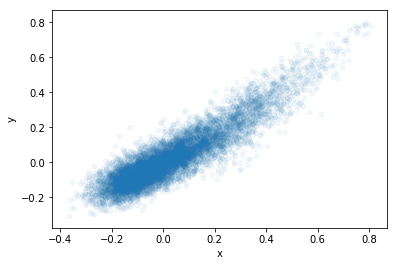

In [304]:
def model_term_similarity(base_model, other_model, word_to_check, common_words):
            
    x_sim = []
    y_sim = []
    
    for common_word in shared:
        if common_word in citance_model.wv.vocab:
            abs_sim = abs_model.similarity(word_to_check, common_word)
            citance_sim = citance_model.similarity(word_to_check, common_word)
            x_sim.append(abs_sim)
            y_sim.append(citance_sim)
        
    df = pd.DataFrame({'x':x_sim, 'y':y_sim, 'word':word_to_check})
    
    return(df)

def get_shared_words(base_model, other_model, topn_words = 10000):
    base_common = base_model.wv.index2entity[:topn_words]
    other_common = citance_model.wv.index2entity[:topn_words]

    shared = []
    for word in base_common:
        if word in other_common:
            shared.append(word)

    return(shared)

shared = get_shared_words(abs_model, citance_model, topn_words = 10000)
df = model_term_similarity(abs_model, citance_model, "sulfoxide", shared)
df.plot('x', 'y', kind='scatter', alpha = 0.05)

In [305]:
shared = get_shared_words(abs_model, citance_model, topn_words = 100000)
terms = ["the", "what", "literature", "very", "uncertain", "regression", "controversial", "discovered", "found", "usually", "london", "sulfoxide"]
all_df = pd.concat([model_term_similarity(abs_model, citance_model, term, shared) for term in terms])

/Users/dakotamurray/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  
/Users/dakotamurray/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/Users/dakotamurray/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  if __name__ == '__main__':


In [307]:
len(shared)

33668

In [306]:
all_df.to_csv("model_similarity_data.txt", sep='\t')

In [297]:
len(abs_model.wv.vocab)

36179

In [298]:
len(citance_model.wv.vocab)

113811

In [299]:
# The number of abstrace sentences
len(abstract_features)

1784155

In [300]:
# The number of citances
len(features)

6813984

In [301]:
pubs_no_na.shape

(199635, 3)